In [120]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [121]:
citations = pd.read_csv('C:\\Users\\10072\\OneDrive\\Desktop\\finding math department structure\\citations.csv',index_col=0)
papers = pd.read_csv('C:\\Users\\10072\\OneDrive\\Desktop\\finding math department structure\\papers.csv',index_col=0)

In [122]:
citations = citations.T
citations = citations.sort_index()

In [123]:
#citations: 
#Rows represent different professors.
#Columns represent papers (by their unique identifiers).
#The entries in the matrix indicate the number of times a particular paper (in the corresponding column)
#has cited any paper by the particular professor (in a given row).
citations

,MR4504450,MR3933391,MR4358671,MR4500640,MR4312365,MR4310891,MR4292179,MR4457373,MR4411466,MR4400191,...,MR3228985,MR2832254,MR2533973,MR2076920,MR3969276,MR3095269,MR2869795,MR2501935,MR2478469,MR1483007
AhlgrenScottD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,3,1,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
papers = papers.T
papers = papers.sort_index()

In [125]:
#Papers: 
#Rows represent different professors.
#Columns represent papers (by their unique identifiers).
#The entries in the matrix indicate the number of times a particular professor (in a given row) has cited a particular paper (in the corresponding column).
papers

,MR2273359,MR2275343,MR1833071,MR2773200,MR2763082,MR2543662,MR3097158,MR4107507,MR2145726,MR2186997,...,MR0485768,MR1463696,MR0826154,MR0144186,MR0159786,MR1320475,MR0155831,MR1346231,MR1043994,MR0159805
AhlgrenScottD_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru_papers,1,1,13,2,0,2,1,0,11,2,...,1,1,1,1,1,1,1,1,1,1


In [126]:
#remove all the cols with one or zero non-zero entries.
mask = (papers != 0).sum(axis=0) == 1
cols_to_drop = mask[mask].index.tolist()
papers = papers.drop(columns=cols_to_drop)
mask = (papers != 0).sum(axis=0) == 0
cols_to_drop = mask[mask].index.tolist()
papers = papers.drop(columns=cols_to_drop)

In [127]:
mask = (citations != 0).sum(axis=0) == 1
cols_to_drop = mask[mask].index.tolist()
citations = citations.drop(columns=cols_to_drop)
mask = (citations != 0).sum(axis=0) == 0
cols_to_drop = mask[mask].index.tolist()
citations = citations.drop(columns=cols_to_drop)

In [128]:
papers

,MR2273359,MR2275343,MR1833071,MR2773200,MR2543662,MR3097158,MR2145726,MR2186997,MR1745884,MR0126420,...,MR1328336,MR1910041,MR0495314,MR2183864,MR1511670,MR2759813,MR0415962,MR2172781,MR1741843,MR0778970
AhlgrenScottD_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
YongAlexanderTF_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
YoungAmanda_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ZaharescuAlexandru_papers,1,1,13,2,2,1,11,2,1,21,...,0,0,0,0,0,0,1,1,0,0


In [129]:
citations

,MR4504450,MR4310891,MR4292179,MR4457373,MR4411466,MR4400191,MR4329869,MR4270822,MR4082991,MR3990310,...,MR4157696,MR4126756,MR4123247,MR4033866,MR3979111,MR3973560,MR4068268,MR3906260,MR4439798,MR2993443
AhlgrenScottD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [130]:
nan_values = citations.isnull().sum()

# Check for infinite values
inf_values = citations.applymap(np.isinf).sum()

print("Number of NaN values in each column:\n", nan_values)
print("\nNumber of Infinite values in each column:\n", inf_values)

Number of NaN values in each column:
 MR4504450    0
MR4310891    0
MR4292179    0
MR4457373    0
MR4411466    0
            ..
MR3973560    0
MR4068268    0
MR3906260    0
MR4439798    0
MR2993443    0
Length: 1665, dtype: int64

Number of Infinite values in each column:
 MR4504450    0
MR4310891    0
MR4292179    0
MR4457373    0
MR4411466    0
            ..
MR3973560    0
MR4068268    0
MR3906260    0
MR4439798    0
MR2993443    0
Length: 1665, dtype: int64


C:\Users\10072\AppData\Local\Temp\ipykernel_12840\2474572563.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inf_values = citations.applymap(np.isinf).sum()


In [131]:
nan_values = papers.isnull().sum()

# Check for infinite values
inf_values = papers.applymap(np.isinf).sum()

print("Number of NaN values in each column:\n", nan_values)
print("\nNumber of Infinite values in each column:\n", inf_values)

C:\Users\10072\AppData\Local\Temp\ipykernel_12840\2754588590.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inf_values = papers.applymap(np.isinf).sum()


Number of NaN values in each column:
 MR2273359    0
MR2275343    0
MR1833071    0
MR2773200    0
MR2543662    0
            ..
MR2759813    0
MR0415962    0
MR2172781    0
MR1741843    0
MR0778970    0
Length: 3437, dtype: int64

Number of Infinite values in each column:
 MR2273359    0
MR2275343    0
MR1833071    0
MR2773200    0
MR2543662    0
            ..
MR2759813    0
MR0415962    0
MR2172781    0
MR1741843    0
MR0778970    0
Length: 3437, dtype: int64


In [132]:
# Check for rows with sum of absolute values equal to zero (for L1)
zero_sum_rows_l1 = (papers.abs().sum(axis=1) == 0)

# Check for rows with sum of squared values equal to zero (for L2)
zero_sum_rows_l2 = (papers.pow(2).sum(axis=1) == 0)

print('Papers')
print("Rows with sum of absolute values equal to zero:", zero_sum_rows_l1.sum())
print("Rows with sum of squared values equal to zero:", zero_sum_rows_l2.sum())

# Identify indices of rows with sum of absolute values equal to zero (for L1)
indices_l1_zero_sum = papers.index[papers.abs().sum(axis=1) == 0].tolist()

# Identify indices of rows with sum of squared values equal to zero (for L2)
indices_l2_zero_sum = papers.index[papers.pow(2).sum(axis=1) == 0].tolist()

print("Indices of rows with sum of absolute values equal to zero:", indices_l1_zero_sum)
print("Indices of rows with sum of squared values equal to zero:", indices_l2_zero_sum)

Papers
Rows with sum of absolute values equal to zero: 1
Rows with sum of squared values equal to zero: 1
Indices of rows with sum of absolute values equal to zero: ['QuanZhiyu_papers']
Indices of rows with sum of squared values equal to zero: ['QuanZhiyu_papers']


In [133]:
# Check for rows with sum of absolute values equal to zero (for L1)
zero_sum_rows_l1 = (citations.abs().sum(axis=1) == 0)

# Check for rows with sum of squared values equal to zero (for L2)
zero_sum_rows_l2 = (citations.pow(2).sum(axis=1) == 0)

print('Citations')
print("Rows with sum of absolute values equal to zero:", zero_sum_rows_l1.sum())
print("Rows with sum of squared values equal to zero:", zero_sum_rows_l2.sum())

# Identify indices of rows with sum of absolute values equal to zero (for L1)
indices_l1_zero_sum = citations.index[citations.abs().sum(axis=1) == 0].tolist()

# Identify indices of rows with sum of squared values equal to zero (for L2)
indices_l2_zero_sum = citations.index[citations.pow(2).sum(axis=1) == 0].tolist()

print("Indices of rows with sum of absolute values equal to zero:", indices_l1_zero_sum)
print("Indices of rows with sum of squared values equal to zero:", indices_l2_zero_sum)

Citations
Rows with sum of absolute values equal to zero: 5
Rows with sum of squared values equal to zero: 5
Indices of rows with sum of absolute values equal to zero: ['CooneyDanielB', 'DuttaSankarPrasad', 'DuursmaIwanMaynard', 'FadinaTolulope', 'QuanZhiyu']
Indices of rows with sum of squared values equal to zero: ['CooneyDanielB', 'DuttaSankarPrasad', 'DuursmaIwanMaynard', 'FadinaTolulope', 'QuanZhiyu']


In [134]:
#drop professor QuanZhiyu col in the paper df and these professor from the citation df
papers = papers.drop('QuanZhiyu_papers',axis = 0)

drop_list = ['CooneyDanielB', 'DuttaSankarPrasad', 'DuursmaIwanMaynard', 'FadinaTolulope', 'QuanZhiyu']
citations = citations.drop(drop_list, axis=0)

In [135]:
papers

,MR2273359,MR2275343,MR1833071,MR2773200,MR2543662,MR3097158,MR2145726,MR2186997,MR1745884,MR0126420,...,MR1328336,MR1910041,MR0495314,MR2183864,MR1511670,MR2759813,MR0415962,MR2172781,MR1741843,MR0778970
AhlgrenScottD_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
YongAlexanderTF_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
YoungAmanda_papers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ZaharescuAlexandru_papers,1,1,13,2,2,1,11,2,1,21,...,0,0,0,0,0,0,1,1,0,0


In [136]:
citations

,MR4504450,MR4310891,MR4292179,MR4457373,MR4411466,MR4400191,MR4329869,MR4270822,MR4082991,MR3990310,...,MR4157696,MR4126756,MR4123247,MR4033866,MR3979111,MR3973560,MR4068268,MR3906260,MR4439798,MR2993443
AhlgrenScottD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [137]:
#L1 & L2 Noramalization

papers_l1 = papers.divide(papers.abs().sum(axis=1), axis=0)
l2_norm = papers.pow(2).sum(axis=1).pow(0.5)
papers_l2 = papers.divide(l2_norm, axis=0)

In [138]:
citations_l1 = citations.divide(citations.abs().sum(axis=1), axis=0)
l2_norm = citations.pow(2).sum(axis=1).pow(0.5)
citations_l2 = citations.divide(l2_norm, axis=0)

In [139]:
#the pca components# plot

def perform_pca_and_plot(data, title="PCA Explained Variance"):
    pca = PCA()
    pca.fit(data)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(10, 5))

    # Plot the explained variance for each component
    plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
            alpha=0.5, align='center', label='Individual explained variance')

    # Plot the cumulative explained variance
    plt.step(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, 
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of components')
    plt.ylabel('Explained variance ratio')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


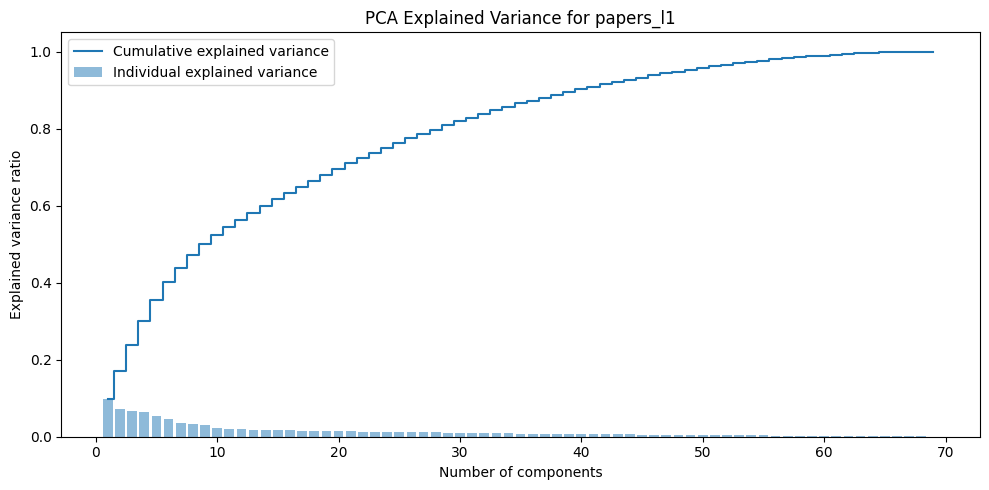

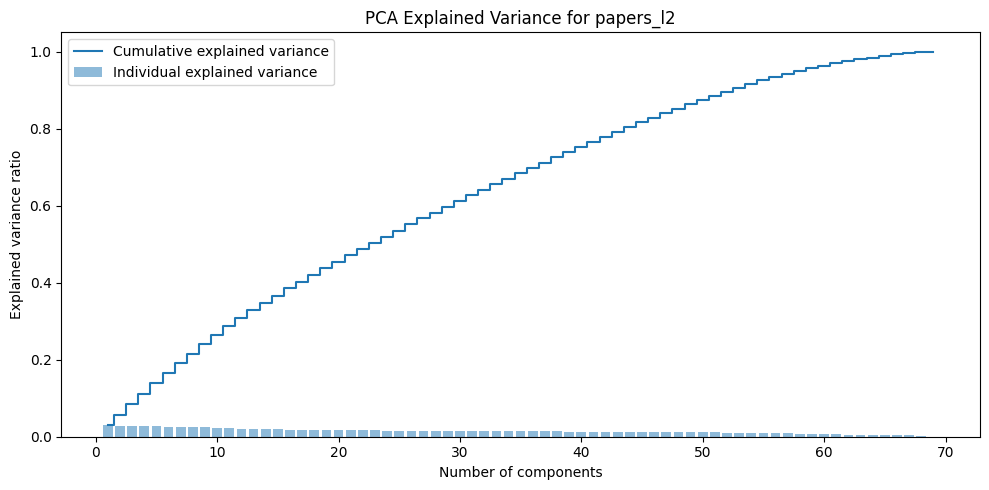

In [140]:
perform_pca_and_plot(papers_l1, title="PCA Explained Variance for papers_l1")
perform_pca_and_plot(papers_l2, title="PCA Explained Variance for papers_l2")

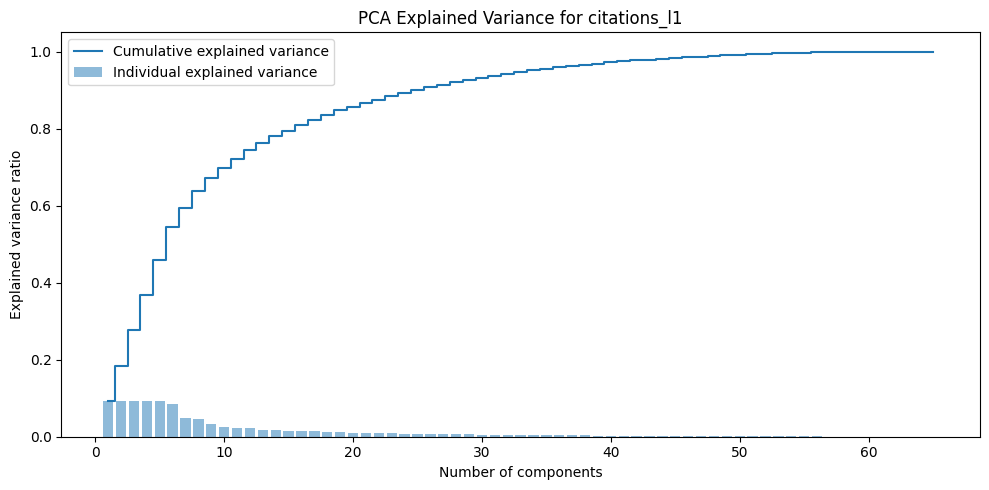

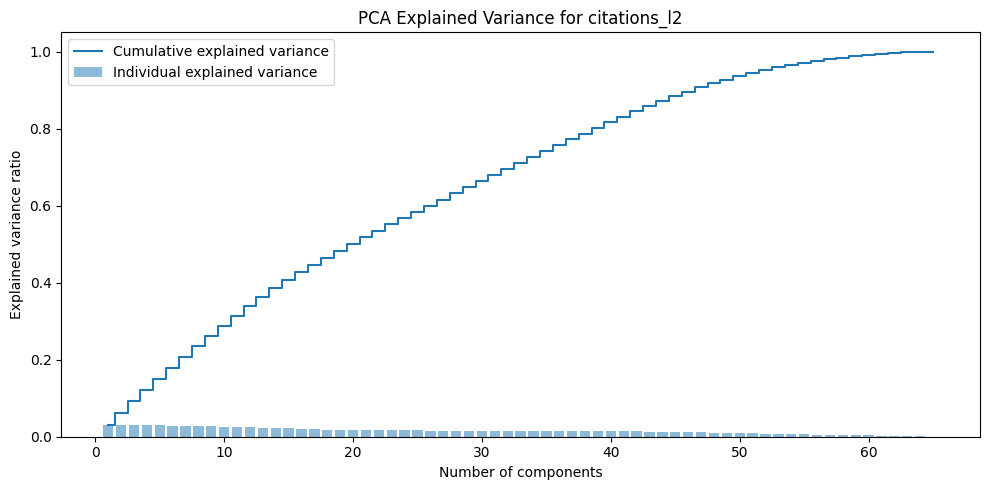

In [141]:
perform_pca_and_plot(citations_l1, title="PCA Explained Variance for citations_l1")
perform_pca_and_plot(citations_l2, title="PCA Explained Variance for citations_l2")

In [142]:
n = 10
pca = PCA(n_components=n)

papers_principalComponents_l1 = pca.fit_transform(papers_l1)
papers_principalComponents_l2 = pca.fit_transform(papers_l2)

citations_principalComponents_l1 = pca.fit_transform(citations_l1)
citations_principalComponents_l2 = pca.fit_transform(citations_l2)

# Create new dataframes to store the principal components for papers_l1 and papers_l2
columns = [f'PC{i+1}' for i in range(n)]

papers_l1_pca = pd.DataFrame(papers_principalComponents_l1, columns=columns)
papers_l1_pca.index = papers_l1.index
print(papers_l1_pca)

papers_l2_pca = pd.DataFrame(papers_principalComponents_l2, columns=columns)
papers_l2_pca.index = papers_l2.index
print(papers_l2_pca)

                                 PC1       PC2       PC3       PC4       PC5  \
AhlgrenScottD_papers       -0.008255 -0.004671 -0.002082 -0.011343 -0.007362   
AlbinPierre_papers         -0.008970 -0.004120 -0.001596 -0.011882 -0.008401   
BaloghJózsef_papers        -0.007660 -0.004283 -0.001841 -0.010499 -0.006605   
BaryshnikovYuliyM_papers   -0.008765 -0.001819  0.001036 -0.008861 -0.007133   
Berwick-EvansDaniel_papers -0.008741 -0.005155 -0.001809 -0.011964 -0.008152   
...                              ...       ...       ...       ...       ...   
WuXuan_papers              -0.005341 -0.006133 -0.002924 -0.015307 -0.010323   
YongAlexanderTF_papers     -0.009343 -0.007752 -0.011135  0.002837 -0.007607   
YoungAmanda_papers         -0.003354 -0.007223 -0.003333 -0.019954 -0.015372   
ZaharescuAlexandru_papers  -0.007921 -0.004524 -0.002097 -0.010433 -0.006802   
ZharnitskyVadim_papers     -0.008347 -0.004686 -0.001947 -0.011763 -0.007609   

                                 PC6   

In [143]:
citations_l1_pca = pd.DataFrame(citations_principalComponents_l1, columns=columns)
citations_l1_pca.index = citations_l1.index
print(citations_l1_pca)

citations_l2_pca = pd.DataFrame(citations_principalComponents_l2, columns=columns)
citations_l2_pca.index = citations_l2.index
print(citations_l2_pca)

                          PC1       PC2       PC3       PC4           PC5  \
AhlgrenScottD       -0.000219 -0.000292 -0.000015 -0.000013 -2.813502e-07   
AlbinPierre         -0.000198 -0.000264 -0.000019  0.000007 -4.255283e-06   
BaloghJózsef        -0.000174 -0.000232 -0.000013 -0.000011  6.241656e-08   
BaryshnikovYuliyM   -0.000187 -0.000249 -0.000014 -0.000013 -2.207123e-07   
Berwick-EvansDaniel -0.000186 -0.000258 -0.000016 -0.000012  1.478793e-06   
...                       ...       ...       ...       ...           ...   
WuXuan              -0.000412 -0.000550 -0.000029 -0.000025 -6.820288e-08   
YongAlexanderTF     -0.000186 -0.000253 -0.000018 -0.000019 -1.104006e-06   
YoungAmanda         -0.109014 -0.262580 -0.195432 -0.467501  7.071116e-01   
ZaharescuAlexandru  -0.000188 -0.000251 -0.000013 -0.000012 -2.360723e-07   
ZharnitskyVadim     -0.000176 -0.000236 -0.000013 -0.000010  2.196873e-08   

                          PC6       PC7       PC8       PC9      PC10  
Ahl

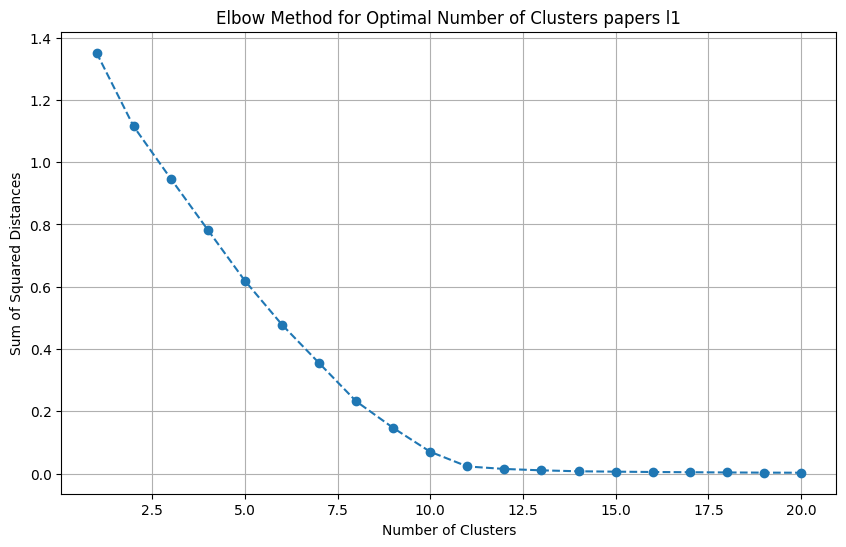

In [144]:
#Using elbow method to find suitable clustering# for each df
inertia = []
cluster_range = range(1, 21)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(papers_l1_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l1')
plt.grid(True)
plt.show()

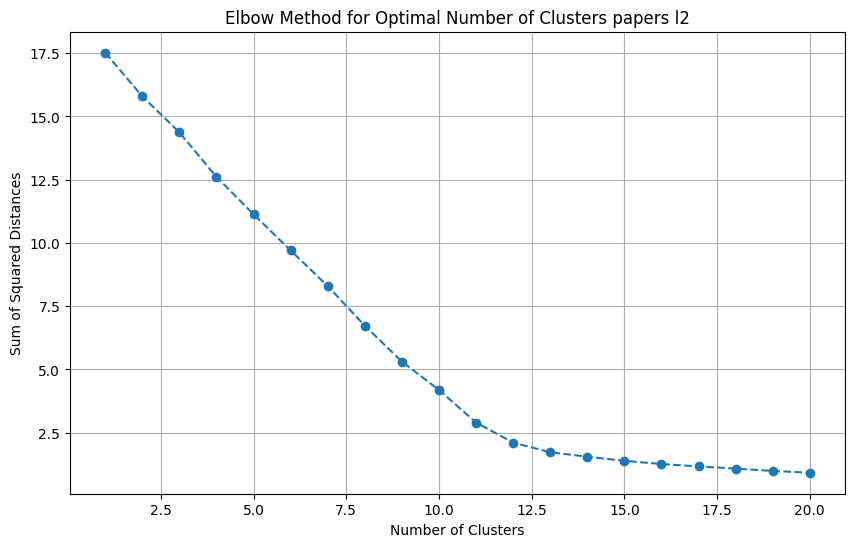

In [145]:
#Using elbow method to find suitable clustering# for each df
inertia = []
cluster_range = range(1, 21)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(papers_l2_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l2')
plt.grid(True)
plt.show()

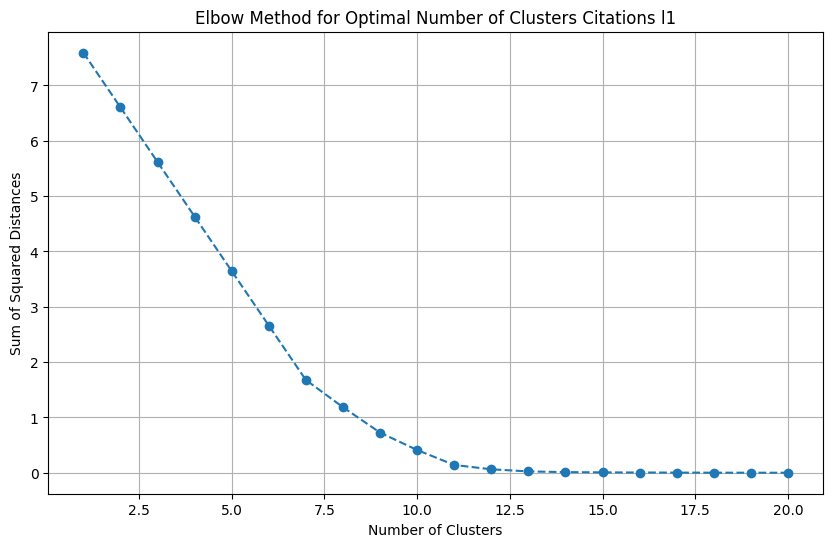

In [146]:
inertia = []
cluster_range = range(1, 21)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(citations_l1_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters Citations l1')
plt.grid(True)
plt.show()

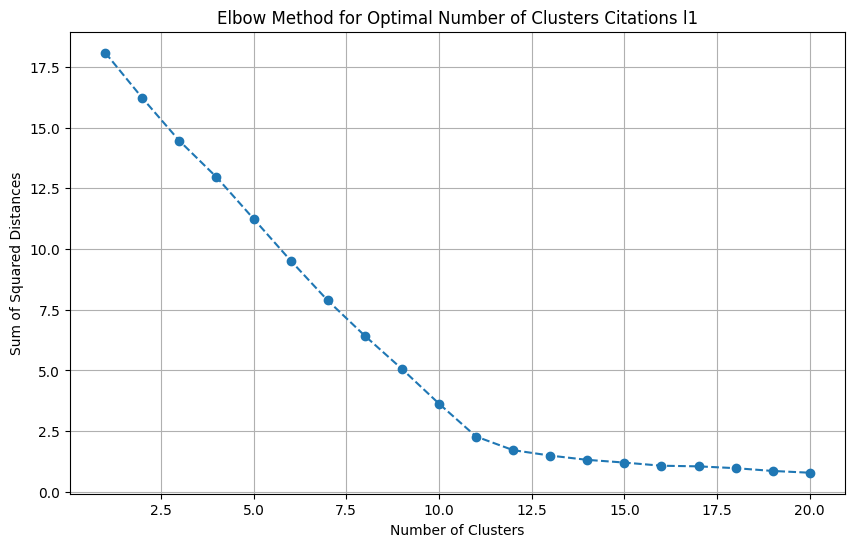

In [147]:
inertia = []
cluster_range = range(1, 21)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(citations_l2_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters Citations l1')
plt.grid(True)
plt.show()

In [148]:
from sklearn.cluster import KMeans

# Function to perform KMeans clustering and print the clusters
def kmeans_clustering(data, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
    data['Cluster'] = kmeans.labels_

    for cluster_num in range(n_clusters):
        print(f"\nCluster {cluster_num + 1} contents:")
        print(data[data['Cluster'] == cluster_num])

# Perform clustering on papers_l1_pca
print("Clustering for papers_l1_pca:")
kmeans_clustering(papers_l1_pca)




Clustering for papers_l1_pca:

Cluster 1 contents:
                                       PC1       PC2       PC3       PC4  \
AhlgrenScottD_papers             -0.008255 -0.004671 -0.002082 -0.011343   
AlbinPierre_papers               -0.008970 -0.004120 -0.001596 -0.011882   
BaloghJózsef_papers              -0.007660 -0.004283 -0.001841 -0.010499   
BaryshnikovYuliyM_papers         -0.008765 -0.001819  0.001036 -0.008861   
Berwick-EvansDaniel_papers       -0.008741 -0.005155 -0.001809 -0.011964   
BocaFlorin-Petre_papers          -0.007849 -0.004342 -0.001872 -0.010570   
BradlowStevenBenjamin_papers     -0.010082 -0.006984 -0.000979 -0.012121   
BronskiJaredC_papers             -0.007892 -0.004392 -0.001895 -0.010835   
DeVilleRELee_papers              -0.007577 -0.004366 -0.001874 -0.010920   
DeyParthaSarathi_papers          -0.008671 -0.005161 -0.002268 -0.012941   
DiFrancescoPhilippe_papers       -0.008054 -0.004499 -0.001964 -0.010985   
DoddChristopher_papers           -0.0

C:\Users\10072\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [149]:
# Perform clustering on papers_l2_pca
print("\nClustering for papers_l2_pca:")
kmeans_clustering(papers_l2_pca)


Clustering for papers_l2_pca:

Cluster 1 contents:
                                 PC1       PC2       PC3       PC4       PC5  \
DiFrancescoPhilippe_papers -0.117492 -0.106501  0.777492  0.355260 -0.024365   
KedemRinat_papers          -0.119271 -0.110845  0.777536  0.354318 -0.022227   

                                 PC6       PC7       PC8       PC9      PC10  \
DiFrancescoPhilippe_papers -0.068346  0.191347  0.042880 -0.125997 -0.144038   
KedemRinat_papers          -0.068369  0.196173  0.037771 -0.126774 -0.146513   

                            Cluster  
DiFrancescoPhilippe_papers        0  
KedemRinat_papers                 0  

Cluster 2 contents:
                                   PC1       PC2       PC3       PC4  \
BaloghJózsef_papers          -0.016898 -0.053118  0.006780  0.011519   
BaryshnikovYuliyM_papers      0.099198  0.092126  0.018409 -0.021310   
BronskiJaredC_papers          0.358583  0.150124 -0.005078  0.035047   
CooneyDanielB_papers          0.014743  0.0

C:\Users\10072\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [150]:
# Perform clustering on papers_l2_pca
print("\nClustering for citations_l1_pca:")
kmeans_clustering(citations_l1_pca)


Clustering for citations_l1_pca:

Cluster 1 contents:
                                PC1       PC2       PC3           PC4  \
AhlgrenScottD             -0.000219 -0.000292 -0.000015 -1.280121e-05   
AlbinPierre               -0.000198 -0.000264 -0.000019  6.734110e-06   
BaloghJózsef              -0.000174 -0.000232 -0.000013 -1.053945e-05   
BaryshnikovYuliyM         -0.000187 -0.000249 -0.000014 -1.327728e-05   
Berwick-EvansDaniel       -0.000186 -0.000258 -0.000016 -1.206367e-05   
BocaFlorin-Petre          -0.000179 -0.000239 -0.000013 -1.104856e-05   
BradlowStevenBenjamin     -0.000039 -0.000210  0.000021 -3.054196e-07   
BronskiJaredC             -0.000172 -0.000230 -0.000012 -1.031291e-05   
DeVilleRELee              -0.000172 -0.000229 -0.000012 -1.032912e-05   
DeyParthaSarathi          -0.000295 -0.000395 -0.000021 -1.723585e-05   
DiFrancescoPhilippe       -0.000775 -0.001684 -0.001088 -2.597994e-03   
DunfieldNathanM           -0.000956 -0.002193 -0.003367  5.184104e-03

C:\Users\10072\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [151]:
# Perform clustering on papers_l2_pca
print("\nClustering for citations_l2_pca:")
kmeans_clustering(citations_l2_pca)


Clustering for citations_l2_pca:

Cluster 1 contents:
                                PC1       PC2       PC3       PC4       PC5  \
AhlgrenScottD             -0.084490  0.129851 -0.011268 -0.002909 -0.023210   
AlbinPierre               -0.040651 -0.043690 -0.035081 -0.025177 -0.020431   
BaryshnikovYuliyM          0.089077 -0.046097 -0.022559  0.102858 -0.045880   
Berwick-EvansDaniel       -0.020156  0.015425 -0.028259 -0.017478  0.004459   
BradlowStevenBenjamin     -0.036358 -0.026219 -0.013504 -0.018522 -0.013520   
DeyParthaSarathi           0.012384 -0.039239 -0.023543  0.012016  0.012747   
DoddChristopher           -0.025631 -0.019525  0.006883  0.017135  0.012410   
FernandesRuiLoja          -0.029941  0.002760 -0.001039  0.012208  0.002934   
GuzmanRosemaryK           -0.036880  0.023276 -0.032220  0.015903  0.005815   
HaboushWilliamJ           -0.023677 -0.032996  0.003161  0.020432  0.025130   
HellerJeremiahBen         -0.034317 -0.030120  0.002269  0.022614  0.034711 

C:\Users\10072\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                    PC1       PC2       PC3       PC4       PC5       PC6  \
LermanEugeneM -0.077146 -0.095335 -0.044297  0.017083  0.066305  0.375407   
TolmanSusan   -0.077323 -0.101422 -0.047431  0.018232  0.063638  0.349543   

                    PC7       PC8       PC9      PC10  Cluster  
LermanEugeneM -0.577950 -0.284616 -0.383546 -0.150870        6  
TolmanSusan   -0.567395 -0.265506 -0.376692 -0.146354        6  

Cluster 8 contents:
                         PC1       PC2       PC3       PC4       PC5  \
DunfieldNathanM    -0.186632 -0.420349 -0.253100 -0.553152 -0.095330   
RasmussenJacob     -0.196023 -0.437168 -0.253199 -0.571187 -0.094592   
RasmussenSarahDean -0.120632 -0.259925 -0.143875 -0.362986 -0.039116   

                         PC6       PC7       PC8       PC9      PC10  Cluster  
DunfieldNathanM    -0.219629  0.092150 -0.076427  0.050256 -0.081636        7  
RasmussenJacob     -0.236872  0.090749 -0.083596  0.043918 -0.127429        7  
RasmussenSarahDean -0.1

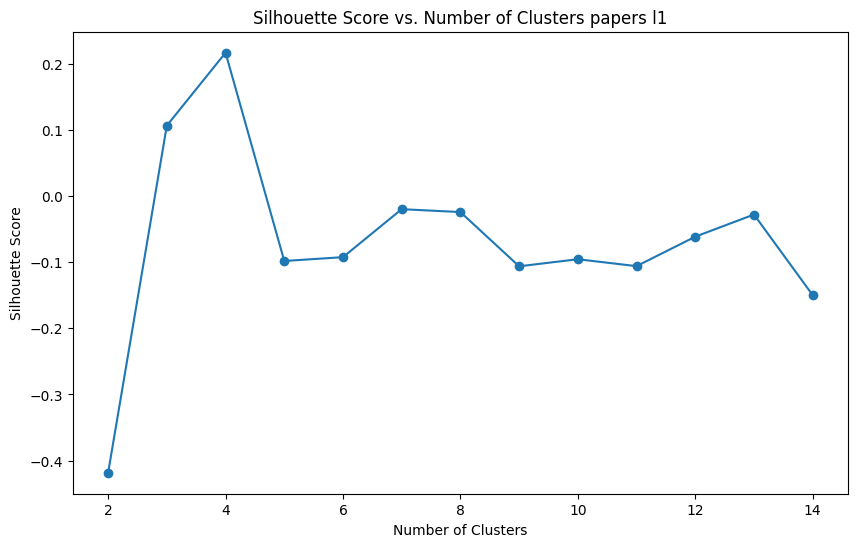

In [152]:
#The silhouette score is a metric used to calculate the goodness of a clustering algorithm. 
#It determines how close each point in one cluster is to the points in the neighboring clusters. 
#Its values range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

range_n_clusters = range(2, 15)  # Let's consider cluster numbers from 2 to 15
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = clusterer.fit_predict(papers_l1_pca)
    silhouette_avg = silhouette_score(papers_l1_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Now you can plot the silhouette_scores to see where the maximum is:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters papers l1')
plt.show()


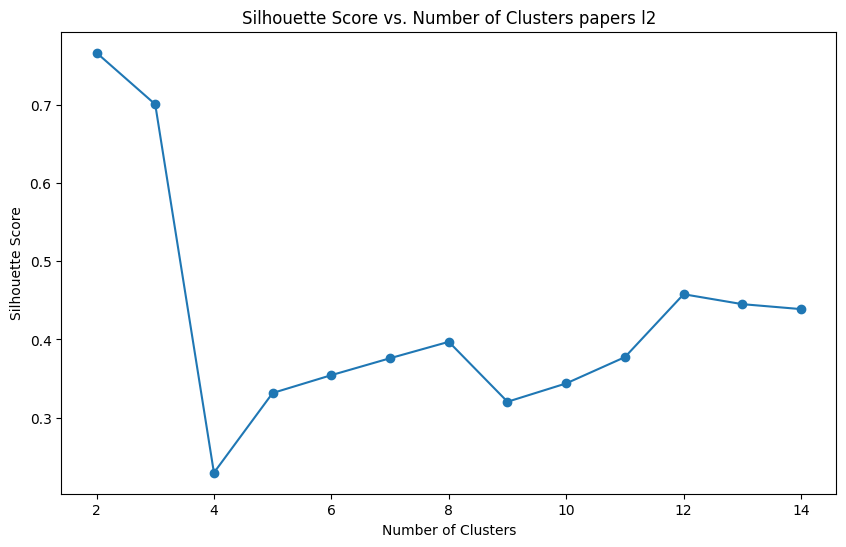

In [153]:
range_n_clusters = range(2, 15)  # Let's consider cluster numbers from 2 to 15
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = clusterer.fit_predict(papers_l2_pca)
    silhouette_avg = silhouette_score(papers_l2_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Now you can plot the silhouette_scores to see where the maximum is:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters papers l2')
plt.show()


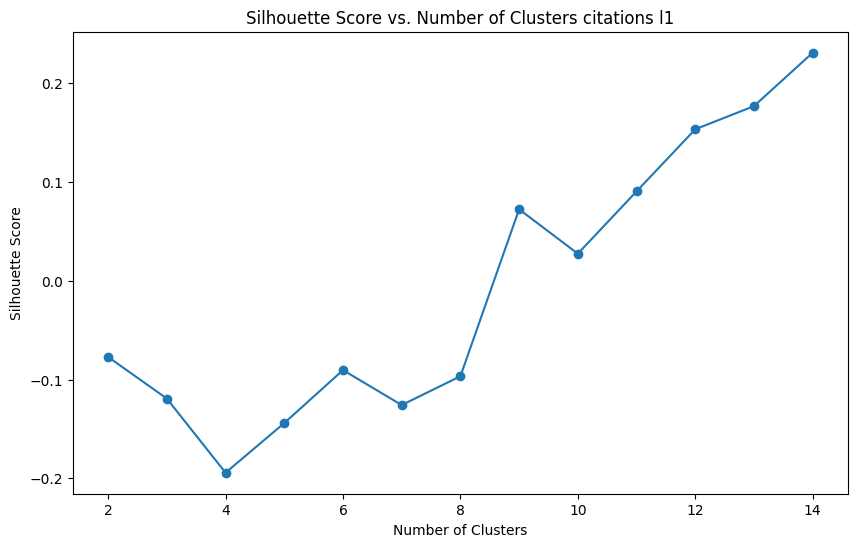

In [154]:
range_n_clusters = range(2, 15)  # Let's consider cluster numbers from 2 to 15
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = clusterer.fit_predict(citations_l1_pca)
    silhouette_avg = silhouette_score(citations_l1_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Now you can plot the silhouette_scores to see where the maximum is:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters citations l1')
plt.show()


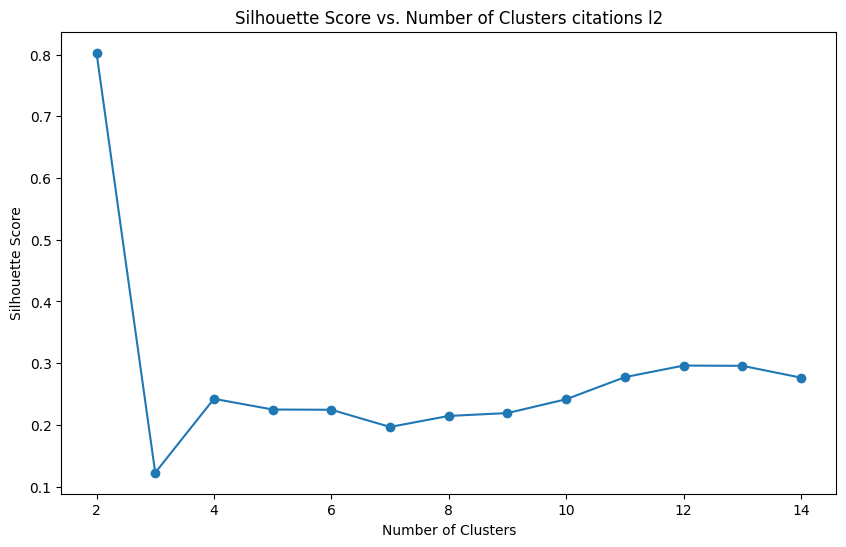

In [155]:
range_n_clusters = range(2, 15)  # Let's consider cluster numbers from 2 to 15
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = clusterer.fit_predict(citations_l2_pca)
    silhouette_avg = silhouette_score(citations_l2_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Now you can plot the silhouette_scores to see where the maximum is:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters citations l2')
plt.show()

In [156]:
from sklearn.cluster import SpectralClustering

# Function to perform Spectral Clustering and print the clusters
def spectral_clustering_method(data, n_clusters=8):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit(data)
    data['Cluster'] = spectral.labels_

    for cluster_num in range(n_clusters):
        print(f"\nCluster {cluster_num + 1} contents:")
        print(data[data['Cluster'] == cluster_num])

# Perform clustering on papers_l1_pca
print("Spectral Clustering for papers_l1_pca:")
spectral_clustering_method(papers_l1_pca)

Spectral Clustering for papers_l1_pca:

Cluster 1 contents:
                                       PC1       PC2       PC3       PC4  \
FengRunhuan_papers               -0.005570 -0.004896 -0.002127 -0.012328   
IvanovSergeiVladimirovich_papers -0.011141  0.020751  0.000246 -0.006360   
JandaFelix_papers                -0.009997 -0.007094 -0.005159 -0.009851   
JingXiaochen_papers              -0.003474 -0.004692 -0.002036 -0.011801   
MineyevIgor_papers               -0.010372  0.004237  0.008173 -0.004449   

                                       PC5       PC6       PC7       PC8  \
FengRunhuan_papers               -0.008008 -0.005574 -0.000235 -0.005449   
IvanovSergeiVladimirovich_papers -0.006608 -0.014878 -0.004094 -0.007569   
JandaFelix_papers                -0.009462 -0.007153 -0.003233 -0.010188   
JingXiaochen_papers              -0.007666 -0.005285 -0.005485 -0.006724   
MineyevIgor_papers               -0.006464 -0.009716 -0.003324 -0.005988   

                          

In [157]:
def spectral_clustering_method(data, n_clusters=10):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit(data)
    data['Cluster'] = spectral.labels_

    for cluster_num in range(n_clusters):
        print(f"\nCluster {cluster_num + 1} contents:")
        print(data[data['Cluster'] == cluster_num])
print("Spectral Clustering for papers_l2_pca:")
spectral_clustering_method(papers_l2_pca)

Spectral Clustering for papers_l2_pca:

Cluster 1 contents:
                                 PC1       PC2       PC3       PC4       PC5  \
BaloghJózsef_papers        -0.016898 -0.053118  0.006780  0.011519 -0.042431   
DeyParthaSarathi_papers     0.006514 -0.034377  0.045645  0.003147 -0.052534   
DiFrancescoPhilippe_papers -0.117492 -0.106501  0.777492  0.355260 -0.024365   
HungPei-Ken_papers          0.000572 -0.009333  0.016478 -0.038773  0.052239   
KedemRinat_papers          -0.119271 -0.110845  0.777536  0.354318 -0.022227   
KostochkaAlexandrV_papers  -0.024769 -0.045808  0.004352  0.008429 -0.033130   
ReznickBruce_papers         0.008626 -0.098816 -0.035373 -0.010619 -0.030200   
WuXuan_papers              -0.018672 -0.008322  0.055195 -0.013386 -0.056989   

                                 PC6       PC7       PC8       PC9      PC10  \
BaloghJózsef_papers        -0.017275  0.066268  0.020453 -0.112038  0.054435   
DeyParthaSarathi_papers    -0.047636  0.065292  0.043806  0

In [158]:
def spectral_clustering_method(data, n_clusters=7):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit(data)
    data['Cluster'] = spectral.labels_

    for cluster_num in range(n_clusters):
        print(f"\nCluster {cluster_num + 1} contents:")
        print(data[data['Cluster'] == cluster_num])
print("Spectral Clustering for citations_l1_pca:")
spectral_clustering_method(citations_l1_pca)

Spectral Clustering for citations_l1_pca:

Cluster 1 contents:
                            PC1       PC2       PC3           PC4  \
AhlgrenScottD         -0.000219 -0.000292 -0.000015 -1.280121e-05   
JandaFelix            -0.000242 -0.000340  0.000086  8.810050e-06   
LaNaveGabriele        -0.000228 -0.000311  0.000010 -6.686721e-06   
LaugesenRichardSnyder -0.000204 -0.000261 -0.000015 -1.487343e-05   
PascaleffJamesThomas  -0.000210 -0.000286  0.000033  3.258853e-07   
ThornerJesse          -0.000209 -0.000277 -0.000013 -1.297594e-05   
TumanovAlexander      -0.000208 -0.000276 -0.000013 -1.270795e-05   

                                PC5       PC6       PC7       PC8       PC9  \
AhlgrenScottD         -2.813502e-07 -0.043352 -0.019967 -0.024592 -0.026466   
JandaFelix            -2.342319e-07 -0.045426 -0.022550 -0.028540 -0.038114   
LaNaveGabriele        -8.436987e-07 -0.045155 -0.022101 -0.027826 -0.035770   
LaugesenRichardSnyder  1.598458e-06 -0.039434 -0.017889 -0.012790 -0

In [159]:
def spectral_clustering_method(data, n_clusters=2):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit(data)
    data['Cluster'] = spectral.labels_

    for cluster_num in range(n_clusters):
        print(f"\nCluster {cluster_num + 1} contents:")
        print(data[data['Cluster'] == cluster_num])
print("Spectral Clustering for citations_l1_pca:")
spectral_clustering_method(citations_l1_pca)

Spectral Clustering for citations_l1_pca:

Cluster 1 contents:
                            PC1       PC2       PC3           PC4  \
AlbinPierre           -0.000198 -0.000264 -0.000019  6.734110e-06   
BaloghJózsef          -0.000174 -0.000232 -0.000013 -1.053945e-05   
Berwick-EvansDaniel   -0.000186 -0.000258 -0.000016 -1.206367e-05   
BocaFlorin-Petre      -0.000179 -0.000239 -0.000013 -1.104856e-05   
BradlowStevenBenjamin -0.000039 -0.000210  0.000021 -3.054196e-07   
FordKevinB            -0.000179 -0.000238 -0.000013 -1.086547e-05   
HinkkanenAimo         -0.000192 -0.000251 -0.000015 -1.511513e-05   
HiraniAnilN           -0.000181 -0.000246 -0.000022  3.256302e-06   
HurVeraMikyoung       -0.000174 -0.000232 -0.000013 -1.049915e-05   
JungeMarius           -0.000162 -0.000229 -0.000012 -1.146640e-05   
KatzSheldonH          -0.001280 -0.003013  0.008015  1.803231e-03   
KermanEly             -0.000182 -0.000245 -0.000014 -9.557076e-06   
KirrEduard            -0.000185 -0.00025

In [68]:
# Plot the pca and try to identify clustering
papers_fig_l1 = px.scatter(papers_l1_pca, x='PC1', y='PC2', hover_name=papers_l1_pca.index)
papers_fig_l1.update_traces(marker=dict(size=5))
papers_fig_l1.update_xaxes(scaleanchor='y', scaleratio=1)
papers_fig_l1.update_yaxes(scaleanchor='x', scaleratio=1)
papers_fig_l1.update_layout(title = 'First Scatter Plot For Papers_l1')
papers_fig_l1.show()

In [69]:
#from above plot, we can observe that professor GuzmanRosemary and QuanZhiyu are obvious outliers.
#So we remove them and regenerate the plot
new_papers_l1_pca = papers_l1_pca.drop(['GuzmanRosemaryK_papers','WeiWei_papers','FadinaTolulope_papers'])
papers_fig_newl1 = px.scatter(new_papers_l1_pca, x='PC1', y='PC2', hover_name=new_papers_l1_pca.index)
papers_fig_newl1.update_traces(marker=dict(size=5))
papers_fig_newl1.update_layout(title = 'Papers_l1 after removing outliers')
papers_fig_newl1.show()

In [70]:
papers_fig_l2 = px.scatter(papers_l2_pca, x='PC1', y='PC2', hover_name=papers_l2_pca.index)
papers_fig_l2.update_traces(marker=dict(size=5))
papers_fig_l2.update_xaxes(scaleanchor='y', scaleratio=1)
papers_fig_l2.update_yaxes(scaleanchor='x', scaleratio=1)
papers_fig_l2.update_layout(title = 'First Scatter Plot For Papers_l2')
papers_fig_l2.show()

In [71]:
new_papers_l2_pca = papers_l2_pca.drop(['TolmanSusan_papers','LermanEugeneM_papers','TzirakisNikolaos_papers','ErdoğanMehmetBurak_papers'])
papers_fig_newl2 = px.scatter(new_papers_l2_pca, x='PC1', y='PC2', hover_name=new_papers_l2_pca.index)
papers_fig_newl2.update_traces(marker=dict(size=5))
papers_fig_newl2.update_layout(title = 'Papers_l2 after removing outliers')
papers_fig_newl2.show()

In [72]:
#Simliar plot methods for citations df
citations_fig_l1 = px.scatter(citations_l1_pca, x='PC1', y='PC2', hover_name=citations_l1_pca.index)
citations_fig_l1.update_traces(marker=dict(size=5))
citations_fig_l1.update_xaxes(scaleanchor='y', scaleratio=1)
citations_fig_l1.update_yaxes(scaleanchor='x', scaleratio=1)
citations_fig_l1.update_layout(title = 'First Scatter Plot For Citations_l1')
citations_fig_l1.show()

In [73]:
#from above plot, we can observe that professor GuzmanRosemary, FengRunhuan, DoddChristopher, LiuYuan and JingXiaoChen are obvious outliers.
#So we remove them and regenerate the plot
new_citations_l1_pca = citations_l1_pca.drop(['GuzmanRosemaryK','WeiWei','YoungAmanda','DoddChristopher','LiuYuan','HungPei-Ken'])
citations_fig_newl1 = px.scatter(new_citations_l1_pca, x='PC1', y='PC2', hover_name=new_citations_l1_pca.index)
citations_fig_newl1.update_traces(marker=dict(size=5))
citations_fig_newl1.update_layout(title = 'Citations_l1 after removing outliers')
citations_fig_newl1.show()

In [74]:
citations_fig_l2 = px.scatter(citations_l2_pca, x='PC1', y='PC2', hover_name=citations_l2_pca.index)
citations_fig_l2.update_traces(marker=dict(size=5))
citations_fig_l2.update_xaxes(scaleanchor='y', scaleratio=1)
citations_fig_l2.update_yaxes(scaleanchor='x', scaleratio=1)
citations_fig_l2.update_layout(title = 'First Scatter Plot For Citations_l2')
citations_fig_l2.show()

In [75]:
#Remove 'TzirakisNikolaos','ErdoğanMehmetBurak'
new_citations_l2_pca = citations_l2_pca.drop(['TzirakisNikolaos','ErdoğanMehmetBurak'])
citations_fig_newl2 = px.scatter(new_citations_l2_pca, x='PC1', y='PC2', hover_name=new_citations_l2_pca.index)
citations_fig_newl2.update_traces(marker=dict(size=5))
citations_fig_newl2.update_layout(title = 'Citations_l2 after removing outliers')
citations_fig_newl2.show()

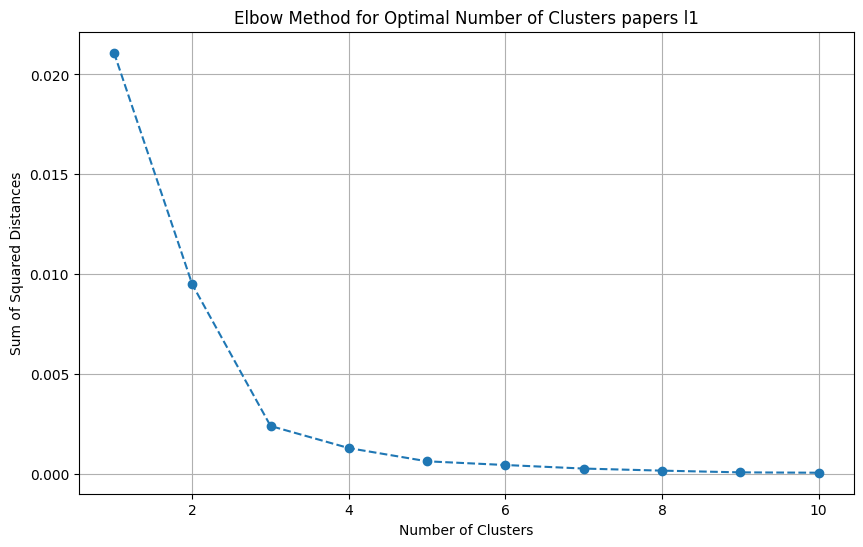

In [76]:
#Using elbow method to find suitable clustering# for each df
inertia = []
cluster_range = range(1, 11)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(new_papers_l1_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l1')
plt.grid(True)
plt.show()

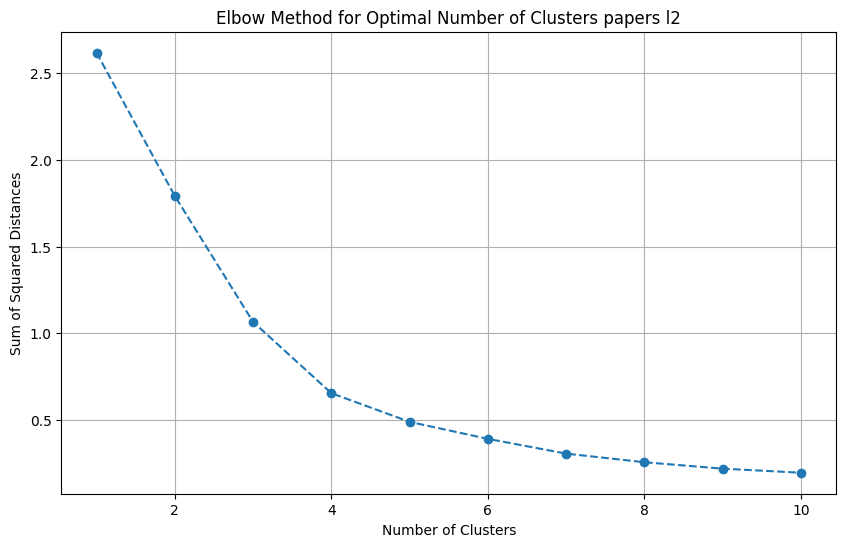

In [77]:
inertia = []
cluster_range = range(1, 11)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(new_papers_l2_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l2')
plt.grid(True)
plt.show()

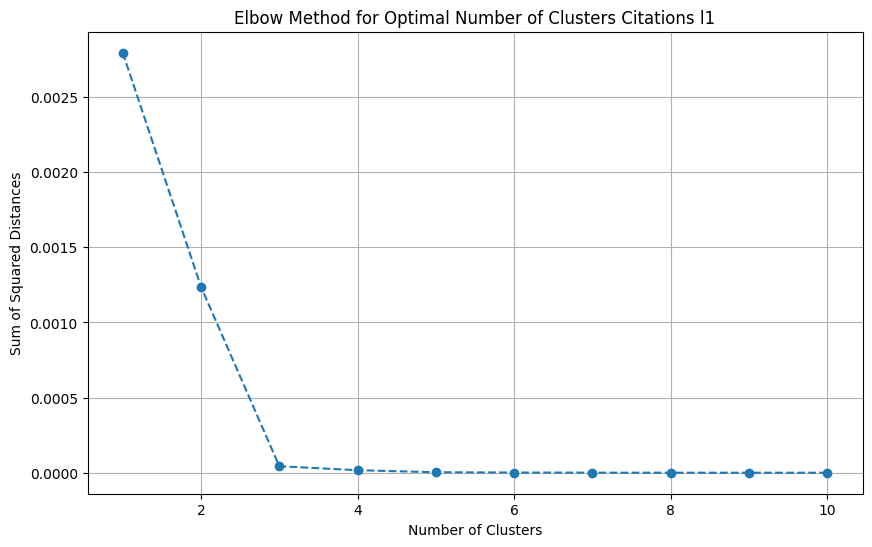

In [78]:
inertia = []
cluster_range = range(1, 11)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(new_citations_l1_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters Citations l1')
plt.grid(True)
plt.show()

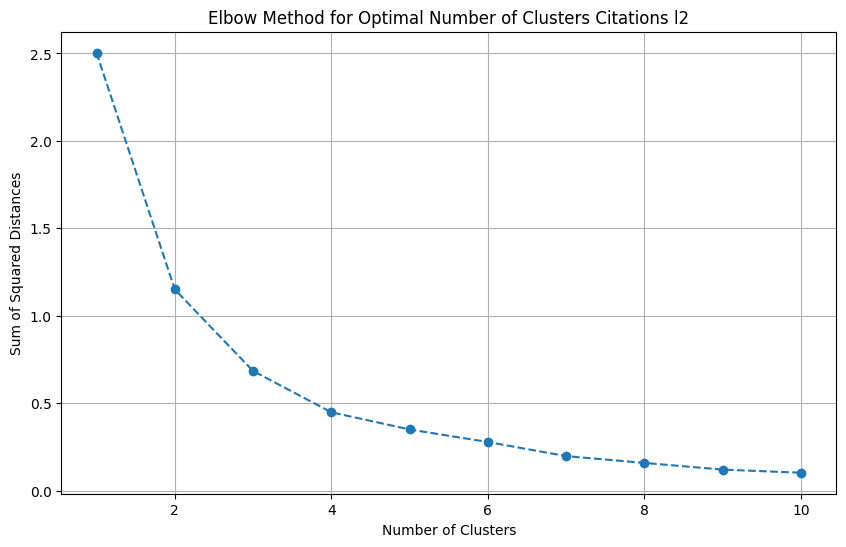

In [79]:
inertia = []
cluster_range = range(1, 11)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 10, random_state=42)
    kmeans.fit(new_citations_l2_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters Citations l2')
plt.grid(True)
plt.show()

In [80]:
#So based on plot above
#the clustering number for each df will be
#papers_l1 3   papers_l2 4
#citations_l1 3      citations_l2 4
#the we based on this to plot the Kmeans clustering

data_to_cluster = new_papers_l1_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_np = data_to_cluster.values

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_np)

# Get the cluster labels
labels = kmeans.labels_

# Create a DataFrame for plotting with plotly
df_plot = pd.DataFrame(data_to_cluster_np, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = labels
df_plot['Point Name'] = data_to_cluster.index  # This assumes the original DataFrame has meaningful row labels

# Create an interactive scatter plot
fig = px.scatter(df_plot, x='Component 1', y='Component 2', color='Cluster', 
                 hover_data=['Point Name'], 
                 title='KMeans Clustering of Papers l1')

# Display the plot
fig.show()

In [86]:
data_to_cluster = new_papers_l2_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_np = data_to_cluster.values

# Fit the KMeans model
kmeans = KMeans(n_clusters=4, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_np)

# Get the cluster labels
labels = kmeans.labels_

# Create a DataFrame for plotting with plotly
df_plot = pd.DataFrame(data_to_cluster_np, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = labels
df_plot['Point Name'] = data_to_cluster.index  # This assumes the original DataFrame has meaningful row labels

# Create an interactive scatter plot
fig = px.scatter(df_plot, x='Component 1', y='Component 2', color='Cluster', 
                 hover_data=['Point Name'], 
                 title='KMeans Clustering of Papers l2')

# Display the plot
fig.show()

# Extracting indices of points in each cluster
clusters_indices = {label: data_to_cluster.index[labels == label].tolist() for label in set(labels)}

# Display the indices of points in each cluster
for cluster, indices in clusters_indices.items():
    print(f"Cluster {cluster}:")
    print(indices)
    print("\n" + "="*40 + "\n")

Cluster 0:
['BocaFlorin-Petre_papers', 'FordKevinB_papers', 'ThornerJesse_papers', 'ZaharescuAlexandru_papers']


Cluster 1:
['AhlgrenScottD_papers', 'BaloghJózsef_papers', 'CooneyDanielB_papers', 'DeyParthaSarathi_papers', 'DiFrancescoPhilippe_papers', 'DunfieldNathanM_papers', 'FadinaTolulope_papers', 'FengRunhuan_papers', 'GuzmanRosemaryK_papers', 'HinkkanenAimo_papers', 'HiraniAnilN_papers', 'HungPei-Ken_papers', 'IvanovSergeiVladimirovich_papers', 'JingXiaochen_papers', 'JungeMarius_papers', 'KedemRinat_papers', 'KostochkaAlexandrV_papers', 'KutzarovaDenkaN_papers', 'LaugesenRichardSnyder_papers', 'LeditzkyFelix_papers', 'LiuYuan_papers', 'MineyevIgor_papers', 'NikolaevIgorG_papers', 'OikhbergTimur_papers', 'RasmussenJacob_papers', 'RasmussenSarahDean_papers', 'ReznickBruce_papers', 'SongRenming_papers', 'SowersRichardB_papers', 'TysonJeremyT_papers', 'WeiWei_papers', 'WuXuan_papers', 'YoungAmanda_papers']


Cluster 2:
['BaryshnikovYuliyM_papers', 'BronskiJaredC_papers', 'DeVilleR

In [82]:
data_to_cluster = new_citations_l1_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_np = data_to_cluster.values

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_np)

# Get the cluster labels
labels = kmeans.labels_

# Create a DataFrame for plotting with plotly
df_plot = pd.DataFrame(data_to_cluster_np, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = labels
df_plot['Point Name'] = data_to_cluster.index  # This assumes the original DataFrame has meaningful row labels

# Create an interactive scatter plot
fig = px.scatter(df_plot, x='Component 1', y='Component 2', color='Cluster', 
                 hover_data=['Point Name'], 
                 title='KMeans Clustering of Citations l1')

# Display the plot
fig.show()

In [84]:
data_to_cluster = new_citations_l2_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_np = data_to_cluster.values

# Fit the KMeans model
kmeans = KMeans(n_clusters=4, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_np)

# Get the cluster labels
labels = kmeans.labels_

# Create a DataFrame for plotting with plotly
df_plot = pd.DataFrame(data_to_cluster_np, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = labels
df_plot['Point Name'] = data_to_cluster.index  # This assumes the original DataFrame has meaningful row labels

# Create an interactive scatter plot
fig = px.scatter(df_plot, x='Component 1', y='Component 2', color='Cluster', 
                 hover_data=['Point Name'], 
                 title='KMeans Clustering of Citations l2')

# Display the plot
fig.show()

# Extracting indices of points in each cluster
clusters_indices = {label: data_to_cluster.index[labels == label].tolist() for label in set(labels)}

# Display the indices of points in each cluster
for cluster, indices in clusters_indices.items():
    print(f"Cluster {cluster}:")
    print(indices)
    print("\n" + "="*40 + "\n")

Cluster 0:
['BaloghJózsef', 'DiFrancescoPhilippe', 'DunfieldNathanM', 'KatzSheldonH', 'KedemRinat', 'KostochkaAlexandrV', 'RasmussenJacob', 'RasmussenSarahDean']


Cluster 1:
['AhlgrenScottD', 'AlbinPierre', 'Berwick-EvansDaniel', 'BradlowStevenBenjamin', 'BronskiJaredC', 'DeVilleRELee', 'DeyParthaSarathi', 'DoddChristopher', 'FengRunhuan', 'FernandesRuiLoja', 'GuzmanRosemaryK', 'HaboushWilliamJ', 'HellerJeremiahBen', 'HinkkanenAimo', 'HiraniAnilN', 'HungPei-Ken', 'HurVeraMikyoung', 'IvanovSergeiVladimirovich', 'JandaFelix', 'JingXiaochen', 'JungeMarius', 'KermanEly', 'LaNaveGabriele', 'LaugesenRichardSnyder', 'LeditzkyFelix', 'LermanEugeneM', 'LiuYuan', 'McCarthyRandy', 'MineyevIgor', 'NikolaevIgorG', 'PascaleffJamesThomas', 'RaptiZoi', 'RezkCharlesW', 'ReznickBruce', 'SongRenming', 'SowersRichardB', 'StojanoskaVesna', 'TolmanSusan', 'TysonJeremyT', 'WeiWei', 'WuXuan', 'YongAlexanderTF', 'YoungAmanda']


Cluster 2:
['BocaFlorin-Petre', 'FordKevinB', 'KutzarovaDenkaN', 'OikhbergTimur',